# Load

In [2]:
import numpy as np
import pandas as pd
import polars as pl
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pathlib
from pathlib import Path

directory_raw = str(Path.cwd().parent) + '\\data_raw\\healthcare\\'

directory_processed = str(Path.cwd().parent) + '\\data\\healthcare\\'
directory_raw

'C:\\Users\\brend\\Dropbox\\Breathe\\data_raw\\healthcare\\'

# Fuctions & Parameters

In [47]:
def read_data(file_name):
    # data = pl.from_pandas(pd.read_csv(directory_raw+'/'+file_name))
    data = pl.from_pandas(pd.read_csv(directory_raw + file_name))
    return data

def save_data(data, file_name):
    data.write_csv(directory_processed + file_name)
    print(f"{file_name} has been saved.")

In [101]:
countries = [
    'costa rica',
    'mexico',
    'australia', 
    'france', 
    'switzerland', 
    'canada',
    'germany',
    'italy',
    'japan',
    'new zealand', # New Zealand
    'norway',
    'united kingdom', # United Kingdom
    'russia', # Russian Federation
    'china',
    'united states', # United States
]

# Cost Per Capita

In [111]:
cost = read_data(file_name='cost_per_capita.csv')
cost = (
    cost
    .with_columns(
        country = cost['country'].str.to_lowercase(),
    )
    .filter(pl.col('country').is_in(countries))
    .unpivot(
        index=['country', ],
        variable_name='year',
        value_name='value',
    )
    .with_columns(
        year = pl.col('year').cast(int),
    )
    .drop_nulls()
    .sort('country')
)
save_data(data=cost, file_name='healthcare_cost_per_capita.csv')
cost.head()

healthcare_cost_per_capita.csv has been saved.


country,year,value
str,i64,f64
"""australia""",2000,1636.528564
"""australia""",2001,1559.821289
"""australia""",2002,1763.695679
"""australia""",2003,2240.746094
"""australia""",2004,2760.830811


C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'What are per-capita healthcare costs over time?')

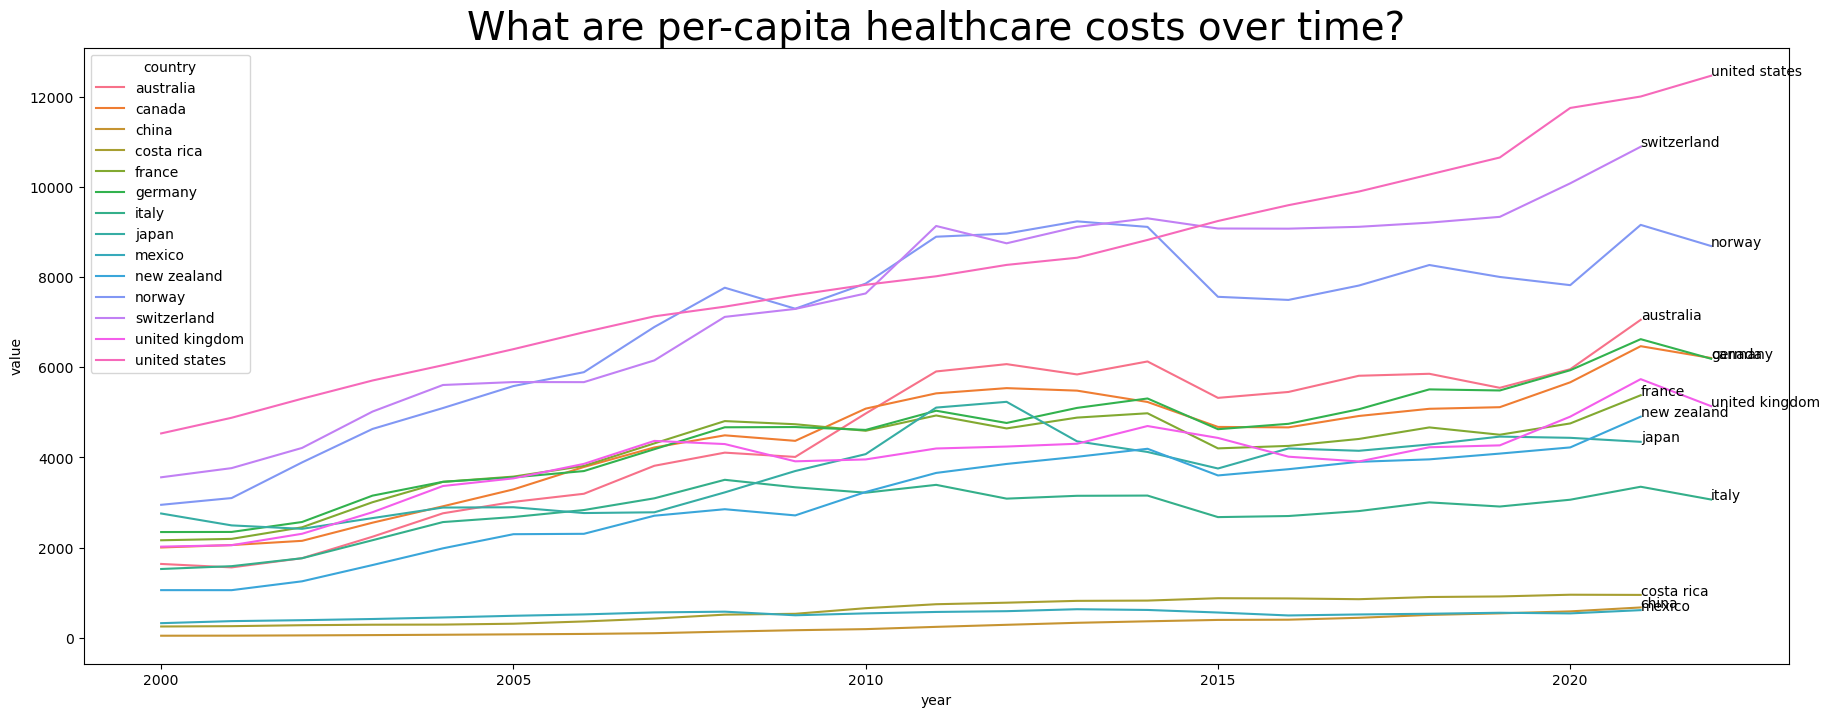

In [104]:
f, ax = plt.subplots(1,1, figsize=[22,8])
sns.lineplot(data=cost, x='year', y='value', hue='country', ax=ax)

last = (
    cost
    .join(
        other=(
            cost
            .group_by('country')
            .agg(
                pl.max('year')
            )
        ),
        on=['country', 'year'],
        how='inner',
    )  
)
for country in last['country']:
    data = last.filter(pl.col('country')==country)
    plt.text(x=data['year'].to_numpy()[0], y=data['value'].to_numpy()[0], s=data['country'].to_numpy()[0])

plt.title("What are per-capita healthcare costs over time?", fontsize=28)

# Life Expentancy

In [105]:
life = read_data(file_name='life_expectancy.csv')

life = (
    life
    .with_columns(
        country = life['country'].str.to_lowercase(),
        year = pl.col('year').cast(int),
    )
    .filter(pl.col('country').is_in(countries))
    .filter(pl.col('sex')=="Both sexes")
    .drop_nulls()
    .sort('country')
)
save_data(data=life, file_name="healthcare_life_expectancy.csv")
life.head()

healthcare_life_expectancy.csv has been saved.


metric,country,year,sex,value,low,high,date_modified
str,str,i64,str,f64,f64,f64,str
"""Life expectancy at birth (year…","""australia""",2021,"""Both sexes""",83.1,83.07,83.19,"""2024-08-02T06:00:00.000Z"""
"""Life expectancy at birth (year…","""australia""",2020,"""Both sexes""",83.37,83.35,83.44,"""2024-08-02T06:00:00.000Z"""
"""Life expectancy at birth (year…","""australia""",2019,"""Both sexes""",82.64,82.63,82.72,"""2024-08-02T06:00:00.000Z"""
"""Life expectancy at birth (year…","""australia""",2018,"""Both sexes""",83.02,83.02,83.09,"""2024-08-02T06:00:00.000Z"""
"""Life expectancy at birth (year…","""australia""",2017,"""Both sexes""",82.68,82.68,82.75,"""2024-08-02T06:00:00.000Z"""


C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\brend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'What is life expectancy over time?')

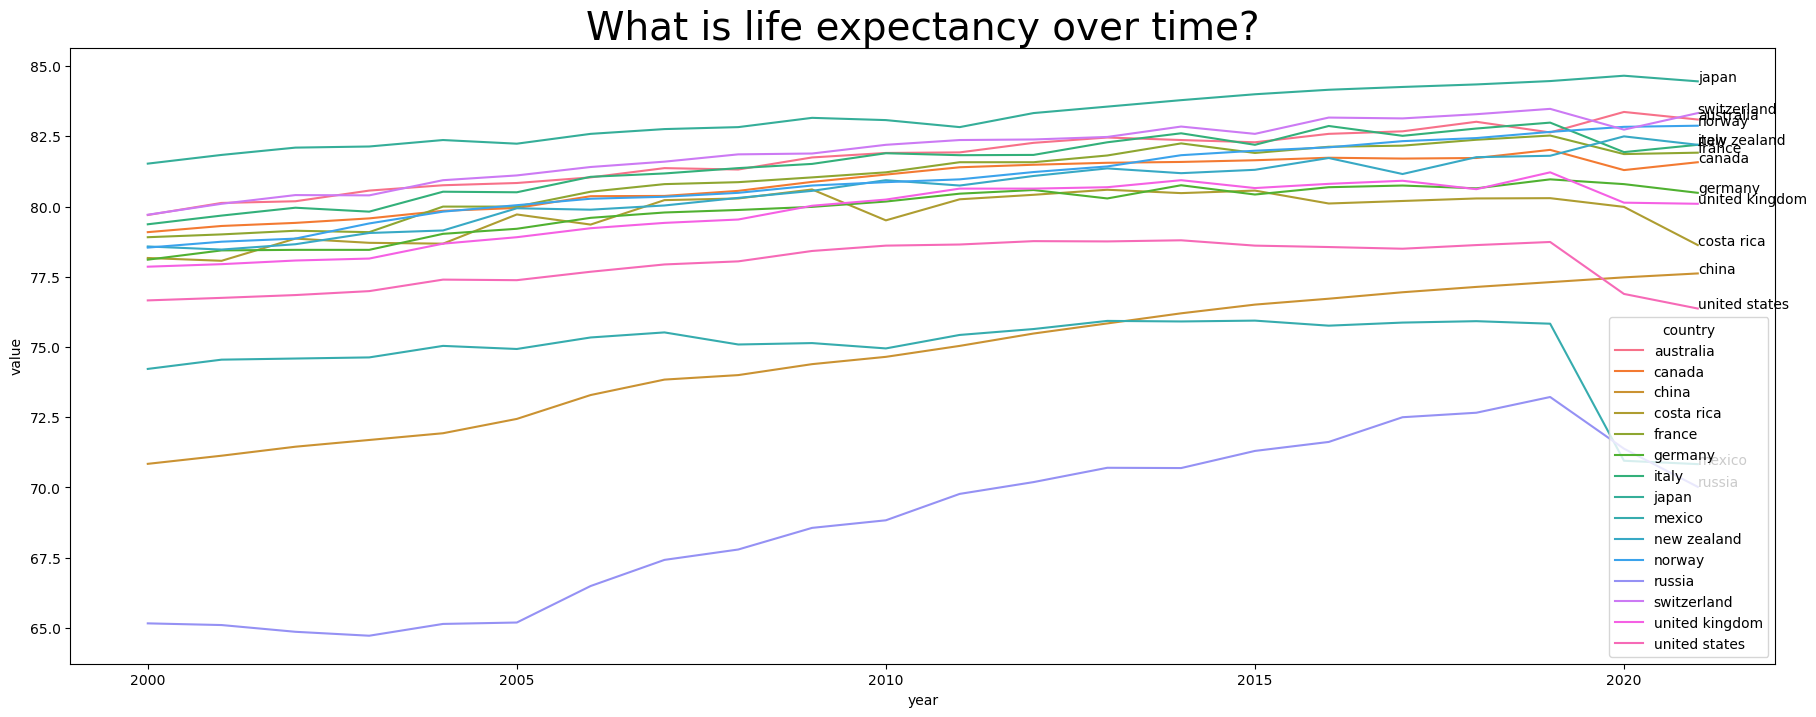

In [106]:
data = life
f, ax = plt.subplots(1,1, figsize=[22,8])
sns.lineplot(data=data, x='year', y='value', hue='country', ax=ax)

last = (
    data
    .join(
        other=(
            data
            .group_by('country')
            .agg(
                pl.max('year')
            )
        ),
        on=['country', 'year'],
        how='inner',
    )  
)
for country in last['country']:
    data_country = last.filter(pl.col('country')==country)
    plt.text(x=data_country['year'].to_numpy()[0], y=data_country['value'].to_numpy()[0], s=data_country['country'].to_numpy()[0])

plt.title("What is life expectancy over time?", fontsize=28)

# Plotly

In [108]:
def plot_timeseries_multiple_countries(data, title, yaxis_title):
    last = (
        data
        .join(
            other=(
                data
                .group_by('country')
                .agg(
                    pl.max('year')
                )
            ),
            on=['country', 'year'],
            how='inner',
        )  
    )
    
    fig = go.Figure(
        data = (
            [
                go.Scatter(
                    name=f"{country}",
                    mode='lines',
                    x=data.filter(pl.col('country')==country)['year'],
                    y=data.filter(pl.col('country')==country)['value'],
                ) for country in countries
            ] + [
                go.Scatter(
                    name="NONE",
                    mode='text',
                    x=last.filter(pl.col('country')==country)['year'],
                    y=last.filter(pl.col('country')==country)['value'],
                    text=f"<b>{country.title()}</b>" if country=='united states' else f"{country.title()}",
                    textposition='middle right',
                ) for country in countries
            ]
        )
    )
    
    fig.update_layout(
        title=dict(
            text=f"<b>{title}</b>",
        ),
        yaxis_title=f"{yaxis_title}",
        xaxis=dict(
            range=[2000, 2026],
        ),
        showlegend=False,
        # template=get_color_template(input.dark_mode()),
        # paper_bgcolor=get_background_color_plotly(input.dark_mode()),
    )
    
    for trace in fig['data']:
        if 'NONE' in trace['name']:
            trace['showlegend']=False
    
    fig.show()

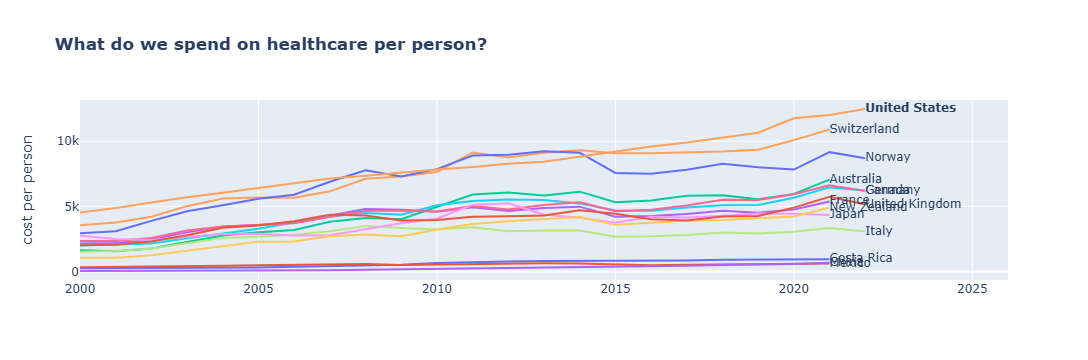

In [109]:
plot_timeseries_multiple_countries(data=cost, title="What do we spend on healthcare per person?", yaxis_title='cost per person')

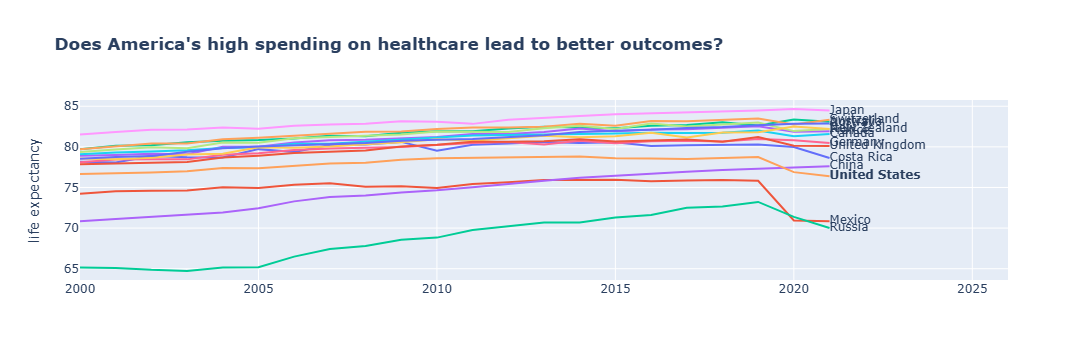

In [110]:
plot_timeseries_multiple_countries(data=life, title="Does America's high spending on healthcare lead to better outcomes?", yaxis_title="life expectancy")
